In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

## Inhouse p19161

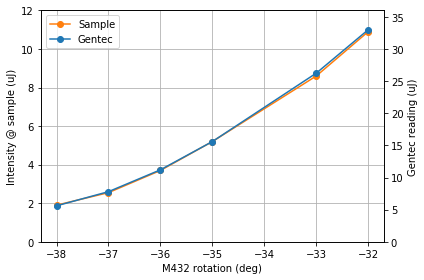

In [3]:
m432 = np.array([-38,-37,-36,-35,-33,-32])
gen = np.array([5.6,7.8,11.2,15.6,26.24,33.0])
sample = np.array([1.9,2.55,3.7,5.2,8.6,10.9])

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns2 = ax2.plot(m432, gen, 'o-',label='Gentec')
lns1 = ax1.plot(m432, sample, 'o-', label='Sample')

ax1.set_xlabel('M432 rotation (deg)')
ax2.set_ylabel('Gentec reading (uJ)')
ax1.set_ylabel('Intensity @ sample (uJ)')

ax1.set_ylim(0,12)
ax2.set_ylim(0,36)

leg = lns1 + lns2
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

plt.tight_layout()

plt.show()

1.115 + 472.96*(cos( np.pi/180*(waveplate_deg - 49.74) ))**2


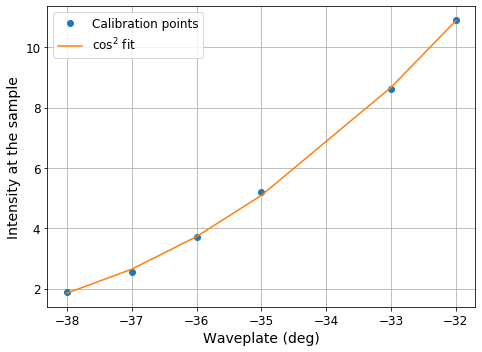

In [33]:
xdata = m432
ydata = sample

def cosine_fit(xdata, xshift, yshift, yscale):
    return yshift + yscale*(np.cos(np.pi/180.*(xdata - xshift)))**2

popt, pcov = curve_fit(cosine_fit, xdata, ydata)
print('{:.3f} + {:.2f}*(cos( np.pi/180*(waveplate_deg - {:.2f}) ))**2'.format(popt[1],popt[2],popt[0]))

plt.figure(figsize=(6.8,5))
plt.plot(xdata, ydata, 'o', label='Calibration points', linestyle='none')
plt.plot(xdata, cosine_fit(xdata, *popt), label=r'cos$^2$ fit')

plt.xlabel('Waveplate (deg)', fontsize=14)
plt.ylabel('Intensity at the sample', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid()
plt.legend(fontsize=12)

plt.tight_layout()

plt.show()

In [ ]:
fluences = 0.20514 +346.78 * (np.cos(np.pi/180*(Waveplate_deg-768.56)))**2

## User experiment Cordones p18956

<Figure size 432x288 with 0 Axes>

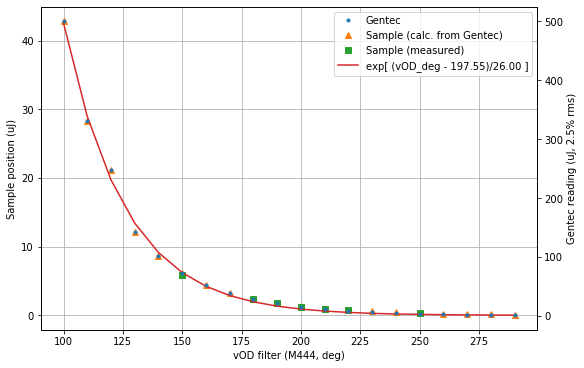

In [72]:
m444 = np.arange(100,300,10)
gen = np.array([500, 331, 247, 142, 101, 72, 52.5, 38.8, 28.8, 21.5, 15.5, 11.8, 9.0, 6.82, 5.23, 4.00, 3.03, 2.31, 1.74, 1.3])
sample = gen*0.08567 - 0.02638
m444_2 = np.array([250,220,210,200,190,180,150])
sample_2 = np.array([0.35, 0.75, 0.98, 1.28, 1.76, 2.34, 5.89])

fig = plt.figure()

fig, ax1 = plt.subplots(1,1,figsize=(8,5),constrained_layout=True)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns1 = ax2.plot(m444, gen, '.',label='Gentec')
lns2 = ax1.plot(m444, sample, '^', label='Sample (calc. from Gentec)')
lns3 = ax1.plot(m444_2, sample_2, 's', label='Sample (measured)')

xdata = m444
ydata = sample

# def cosine_fit(xdata, xshift, yshift, yscale):
#     return yshift + yscale*(np.cos(np.pi/180.*(xdata - xshift)))**2

def exp_fit(xdata, xshift, a):
    return (np.exp((-xdata + xshift)/a))

popt, pcov = curve_fit(exp_fit, xdata, ydata, p0=[210,20])
fit_expression = ('exp[ (vOD_deg - {:.2f})/{:.2f} ]'.format(popt[0],popt[1]))

# plt.figure(figsize=(6.8,5))
# plt.plot(xdata, ydata, 'o', label='Calibration points', linestyle='none')
lns4 = ax1.plot(xdata, exp_fit(xdata, *popt), label=fit_expression)

ax1.set_xlabel('vOD filter (M444, deg)')
ax2.set_ylabel('Gentec reading (uJ, 2.5% rms)')
ax1.set_ylabel('Sample position (uJ)')

# ax1.set_ylim(0,12)
# ax2.set_ylim(0,36)

leg = lns1 + lns2 + lns3 + lns4
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

# plt.tight_layout()


plt.show()

In [9]:
sample


array([42.80862  , 28.33039  , 21.13411  , 12.13876  ,  8.62629  ,
        6.14186  ,  4.471295 ,  3.297616 ,  2.440916 ,  1.815525 ,
        1.301505 ,  0.984526 ,  0.74465  ,  0.5578894,  0.4216741,
        0.3163   ,  0.2332001,  0.1715177,  0.1226858,  0.084991 ])

## Inhouse p19198

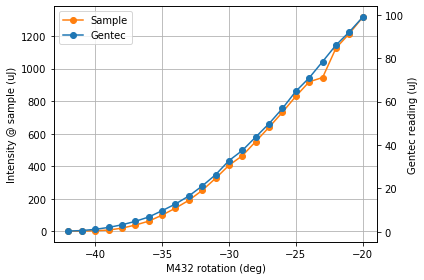

In [6]:
m432 = np.arange(-42, -19)
gen = np.array([0.3, 0.56, 1.1, 2.0, 3.2, 4.8, 6.8, 9.7, 12.8, 16.5, 21.1, 26.3,
                32.8, 37.5, 43.7, 49.9, 56.9, 64.8, 71.0, 78.5, 86.1, 92.2, 99])
sample = np.array([63, 63, 65.4, 70.3, 81.2, 99.1, 125, 162, 204, 252, 316, 389,
                  470, 530, 617, 704, 796, 895, 983, 1010, 1190, 1280, 1380])
offset = np.array([61,61,61,62,61,60,62,62,61,61,64,63,64,65,65,64,64,65,64,65,64,65,64])

sample -= offset

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns2 = ax2.plot(m432, gen, 'o-',label='Gentec')
lns1 = ax1.plot(m432, sample, 'o-', label='Sample')

ax1.set_xlabel('M432 rotation (deg)')
ax2.set_ylabel('Gentec reading (uJ)')
ax1.set_ylabel('Intensity @ sample (uJ)')

# ax1.set_ylim(0,12)
# ax2.set_ylim(0,36)

leg = lns1 + lns2
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

plt.tight_layout()

plt.show()

-12.984 + 9978.00*(cos( np.pi/180*(waveplate_deg - -3551.59) ))**2


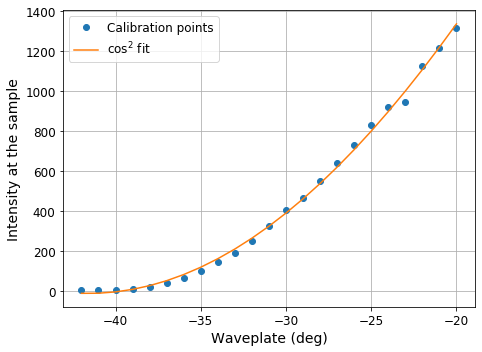

In [8]:
xdata = m432
ydata = sample

def cosine_fit(xdata, xshift, yshift, yscale):
    return yshift + yscale*(np.cos(np.pi/180.*(xdata - xshift)))**2

popt, pcov = curve_fit(cosine_fit, xdata, ydata)
print('{:.3f} + {:.2f}*(cos( np.pi/180*(waveplate_deg - {:.2f}) ))**2'.format(popt[1],popt[2],popt[0]))

plt.figure(figsize=(6.8,5))
plt.plot(xdata, ydata, 'o', label='Calibration points', linestyle='none')
plt.plot(xdata, cosine_fit(xdata, *popt), label=r'cos$^2$ fit')

plt.xlabel('Waveplate (deg)', fontsize=14)
plt.ylabel('Intensity at the sample', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid()
plt.legend(fontsize=12)

plt.tight_layout()

plt.show()

In [ ]:
fit: -12.984 + 9978.00*(cos( np.pi/180*(waveplate_deg + 3551.59) ))**2

cos2 fit:  -12.984 + 9978.00*(cos( np.pi/180*(waveplate_deg + 3551.59) ))**2
poly fit:  2.802 x**2 + 235.619 x + 4935.96


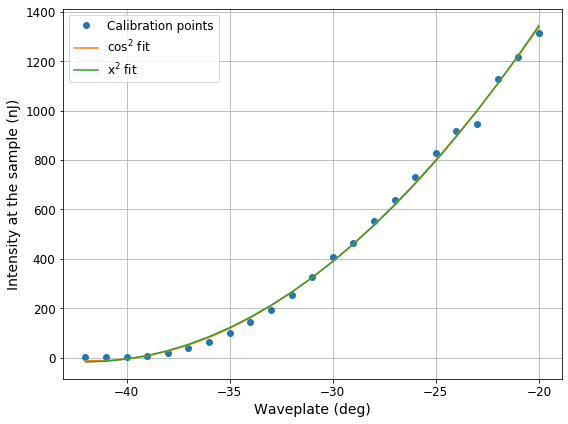

In [20]:
xdata = m432
ydata = sample

def cosine_fit(xdata, xshift, yshift, yscale):
    return yshift + yscale*(np.cos(np.pi/180.*(xdata - xshift)))**2

popt, pcov = curve_fit(cosine_fit, xdata, ydata)
coef = np.polyfit(xdata, ydata, 2)
print('cos2 fit:  {:.3f} + {:.2f}*(cos( np.pi/180*(waveplate_deg + {:.2f}) ))**2'.format(popt[1],popt[2],-popt[0]))
print('poly fit:  {:.3f} x**2 + {:.3f} x + {:.2f}'.format(coef[0],coef[1],coef[2]))

plt.figure(figsize=(8,6))
plt.plot(xdata, ydata, 'o', label='Calibration points', linestyle='none')
plt.plot(xdata, cosine_fit(xdata, *popt), label=r'cos$^2$ fit')
plt.plot(xdata, np.polyval(coef, xdata), label=r'x$^2$ fit')

plt.xlabel('Waveplate (deg)', fontsize=14)
plt.ylabel('Intensity at the sample (nJ)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid()
plt.legend(fontsize=12)

plt.tight_layout()

plt.show()

## p19465

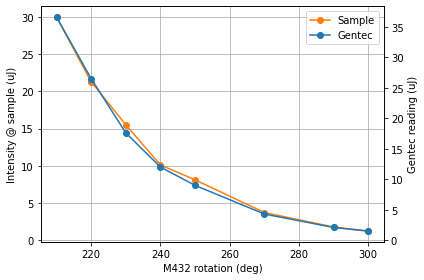

In [2]:
m432 = np.array([300,290,270,250,240,230,220,210])

gen = np.array([1.5,2.1,4.3,9,12,17.6,26.5,36.6])
sample = np.array([1.2,1.75,3.7,8.1,10.1,15.5,21.3,30])


# offset = np.array([61,61,61,62,61,60,62,62,61,61,64,63,64,65,65,64,64,65,64,65,64,65,64])

# sample -= offset

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns2 = ax2.plot(m432, gen, 'o-',label='Gentec')
lns1 = ax1.plot(m432, sample, 'o-', label='Sample')

ax1.set_xlabel('M432 rotation (deg)')
ax2.set_ylabel('Gentec reading (uJ)')
ax1.set_ylabel('Intensity @ sample (uJ)')

# ax1.set_ylim(0,12)
# ax2.set_ylim(0,36)

leg = lns1 + lns2
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

plt.tight_layout()

plt.show()

<Figure size 432x288 with 0 Axes>

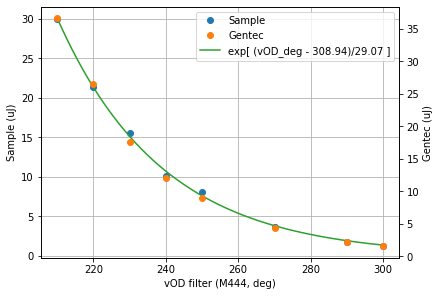

In [48]:
m444 = np.array([300,290,270,250,240,230,220,210])
gen = np.array([1.5,2.1,4.3,9,12,17.6,26.5,36.6])
sample = np.array([1.2,1.75,3.7,8.1,10.1,15.5,21.3,30])


fig = plt.figure()

fig, ax1 = plt.subplots(1,1,constrained_layout=True)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns1 = ax1.plot(m444, sample, 'o', label='Sample')
lns2 = ax2.plot(m444, gen, 'o',label='Gentec')

xdata = m444
ydata = sample

# def cosine_fit(xdata, xshift, yshift, yscale):
#     return yshift + yscale*(np.cos(np.pi/180.*(xdata - xshift)))**2

def exp_fit(xdata, xshift, a):
    return (np.exp((-xdata + xshift)/a))

popt, pcov = curve_fit(exp_fit, xdata, ydata, p0=[210,20])
fit_expression = ('exp[ (vOD_deg - {:.2f})/{:.2f} ]'.format(popt[0],popt[1]))

xfit = np.linspace(xdata[0], xdata[-1], 1000)
yfit = exp_fit(xfit, *popt)

# plt.figure(figsize=(6.8,5))
# plt.plot(xdata, ydata, 'o', label='Calibration points', linestyle='none')
lns4 = ax1.plot(xfit, yfit, label=fit_expression)

ax1.set_xlabel('vOD filter (M444, deg)')
ax2.set_ylabel('Gentec (uJ)')
ax1.set_ylabel('Sample (uJ)')

# ax1.set_ylim(0,12)
# ax2.set_ylim(0,36)

leg = lns1 + lns2 + lns4
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

# plt.tight_layout()


plt.show()

# Test HDF5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

In [7]:
path = '/sf/alvra/data/p19161/raw/AuNP_80nm_static/'

bsdata = h5py.File(path+'run_001492.BSDATA.h5', 'r')
juf = h5py.File(path+'run_001492.JF06T32V02.h5', 'r')

print(list(juf.keys()))
print('')
list(bsdata.keys())

['data', 'general']



['S10BC01-DBAM070:EOM1_T1',
 'SAR-CVME-TIFALL4:EvtSet',
 'SAR-CVME-TIFALL5:EvtSet',
 'SARES11-GES1:BUFF_BS_INT',
 'SARES11-GES1:BUFF_WFM_CTR',
 'SARES11-GES1:CH1_BUFFER',
 'SARES11-GES1:CH1_VAL_GET',
 'SARES11-GES1:CH2_BUFFER',
 'SARES11-GES1:CH2_VAL_GET',
 'SARES11-LSCP10-FNS:CH0:VAL_GET',
 'SARES11-LSCP10-FNS:CH1:VAL_GET',
 'SARES11-LSCP10-FNS:CH2:VAL_GET',
 'SARES11-LSCP10-FNS:CH3:VAL_GET',
 'SARES11-LSCP10-FNS:CH4:VAL_GET',
 'SARES11-LSCP10-FNS:CH5:VAL_GET',
 'SARES11-LSCP10-FNS:CH6:VAL_GET',
 'SARES11-LSCP10-FNS:CH7:VAL_GET',
 'SARES11-SPEC125-M2.roi_background_x_profile',
 'SARES11-SPEC125-M2.roi_signal_x_profile',
 'SARES11-XSAM125:ENC_X1_BS',
 'SARES11-XSAM125:ENC_Y1_BS',
 'SARES11-XSAM125:ENC_Z1_BS',
 'SARFE10-PBIG050-EVR0:CALCI',
 'SARFE10-PBPG050:FELPHOTENE',
 'SARFE10-PBPG050:HAMP-INTENSITY-CAL',
 'SARFE10-PBPG050:PHOTON-ENERGY-PER-PULSE-AVG',
 'SARFE10-PBPS053:INTENSITY',
 'SARFE10-PBPS053:XPOS',
 'SARFE10-PBPS053:YPOS',
 'SARFE10-PSSS059:SPECTRUM_CENTER',
 'SARFE10-PSSS05

In [42]:
PBPS117 = bsdata['SAROP11-PBPS117:INTENSITY']
PBPS122 = bsdata['SAROP11-PBPS122:INTENSITY']

print(list(PBPS122.keys()))

Izero117 = PBPS117['data']
Izero122 = PBPS122['data']

print(Izero117.shape, Izero122.shape)

print('Izero117 data type: "{}"'.format(Izero117.dtype))

list(bsdata.attrs)

['data', 'pulse_id', 'timestamp']
(995,) (1000,)
Izero117 data type: ">f8"


['file_create_datetime']

In [56]:
np.shape(juf['data/JF06T32V02/data']) # 1000 shots, 16Mpix, 1024 what?

(1000, 16384, 1024)